In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Get the current directory where the notebook is running (which is 'src')
notebook_current_dir = os.getcwd()
# Get the parent directory (which will be the project root 'PCB_Defect_Detection')
project_root_dir = os.path.abspath(os.path.join(notebook_current_dir, os.pardir))

In [3]:
# Now, construct the path to your dataset from the project root
fo_path = os.path.join(project_root_dir, 'data', 'augmented_dataset')
print(f"Dataset path being used: {fo_path}")

Dataset path being used: E:\SIVASRINIVASAN SYSTEM\TANSAM AI Projects\PCB Defect Detection\PCB_Defect_Detection\data\augmented_dataset


In [4]:
# --- Image Dimensions and Batch Size ---
img_h, img_w = 224, 224
batch_size = 32

In [5]:
# --- Data Augmentation and Generators ---
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
tf.random.set_seed(42)

In [7]:
train_generator = train_datagen.flow_from_directory(
    fo_path,
    target_size=(img_h, img_w),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 1615 images belonging to 5 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
    fo_path,
    target_size=(img_h, img_w),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False # IMPORTANT: Set shuffle to False for consistent evaluation
)
print("\nClass Indices from ImageDataGenerator:")
print(train_generator.class_indices)

Found 402 images belonging to 5 classes.

Class Indices from ImageDataGenerator:
{'Burnt': 0, 'Cu pad Damaged': 1, 'Non-Defective': 2, 'Rust': 3, 'Water Damaged': 4}


In [9]:
# --- Model Definition (Convolutional Neural Network - CNN) ---
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_h, img_w, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])


E:\SIVASRINIVASAN SYSTEM\TANSAM AI Projects\PCB Defect Detection\PCB_Defect_Detection\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# --- Model Compilation ---
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)


--- Model Training Started ---
Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 246s 5s/step - accuracy: 0.3386 - loss: 3.3504 - val_accuracy: 0.7734 - val_loss: 0.6496
Epoch 2/30
 1/50 ━━━━━━━━━━━━━━━━━━━━ 47s 964ms/step - accuracy: 0.7500 - loss: 0.6024

E:\SIVASRINIVASAN SYSTEM\TANSAM AI Projects\PCB Defect Detection\PCB_Defect_Detection\venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 432ms/step - accuracy: 0.7500 - loss: 0.6024 - val_accuracy: 0.7943 - val_loss: 0.5998
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.7939 - loss: 0.5596 - val_accuracy: 0.8307 - val_loss: 0.4731
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 474ms/step - accuracy: 0.8125 - loss: 0.5544 - val_accuracy: 0.8724 - val_loss: 0.3807
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.8859 - loss: 0.3040 - val_accuracy: 0.8984 - val_loss: 0.3025
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 515ms/step - accuracy: 0.9688 - loss: 0.2038 - val_accuracy: 0.9115 - val_loss: 0.2496
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 222s 4s/step - accuracy: 0.9650 - loss: 0.1240 - val_accuracy: 0.9115 - val_loss: 0.2340
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 28s 542ms/step - accuracy: 0.9375 - loss: 0.1201 - val_accuracy: 0.9062 - val_loss: 0.2538
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 236s 5s/step - accuracy: 0.9829 - loss: 0.0591 - val_accuracy: 0.9505 - val_

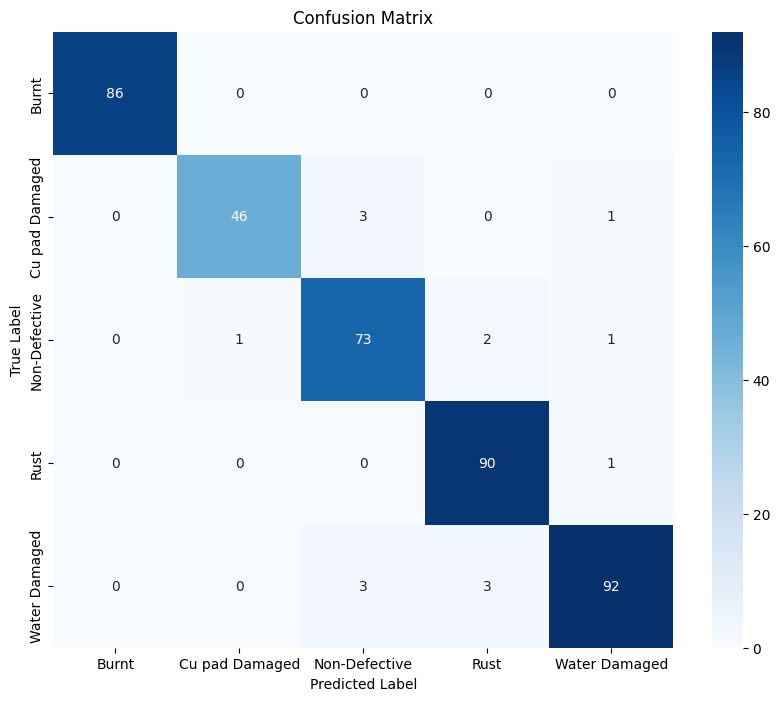


--- Accuracy per Class ---
Burnt: 100.00%
Cu pad Damaged: 92.00%
Non-Defective: 94.81%
Rust: 98.90%
Water Damaged: 93.88%


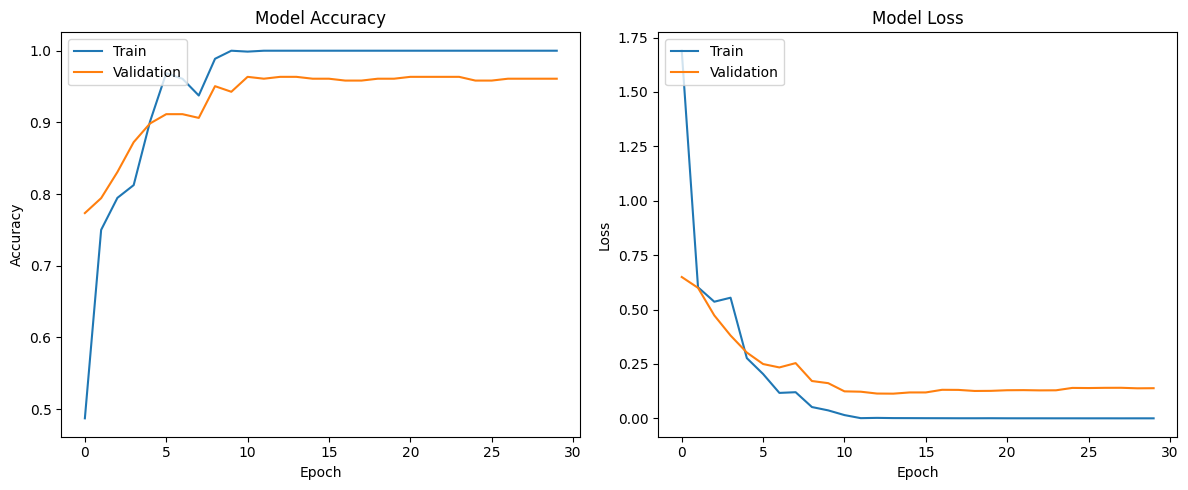

In [12]:
# --- Model Training ---
print("\n--- Model Training Started ---")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30, # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)
print("--- Model Training Finished ---")




# --- Evaluate Model on Validation Data and Generate Confusion Matrix ---
print("\n--- Evaluating Model and Generating Confusion Matrix ---")

validation_generator.reset()

Y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred_classes = np.argmax(Y_pred, axis=1)

y_true = validation_generator.classes[validation_generator.index_array]

class_names = [k for k, v in sorted(validation_generator.class_indices.items(), key=lambda item: item[1])]

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

total_samples_per_class = np.sum(cm, axis=1)
correct_predictions_per_class = np.diag(cm)
accuracy_per_class = [
    correct_predictions_per_class[i] / total_samples_per_class[i] if total_samples_per_class[i] > 0 else 0
    for i in range(len(class_names))
]
print("\n--- Accuracy per Class ---")

for i, class_name in enumerate(class_names):
    print(f"{class_name}: {accuracy_per_class[i]*100:.2f}%")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [13]:
# --- Save the Trained Model ---
model_save_path = os.path.join(project_root_dir, 'models', 'pcb_cnn.h5')
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)  # Ensure directory exists
model.save(model_save_path, include_optimizer=False, save_format='h5')
print(f"Model saved to: {model_save_path}")


Model saved to: E:\SIVASRINIVASAN SYSTEM\TANSAM AI Projects\PCB Defect Detection\PCB_Defect_Detection\models\pcb_cnn.h5


In [18]:
import os

# Set the model save path (update if needed)
model_save_path = os.path.join('models', 'pcb_cnn.h5')

# Ensure 'models/' folder exists
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the model in TensorFlow 2.10 compatible format
model.save(model_save_path)  # Do NOT use save_format
print(f"✅ Model saved to: {os.path.abspath(model_save_path)}")


✅ Model saved to: E:\SIVASRINIVASAN SYSTEM\TANSAM AI Projects\PCB Defect Detection\PCB_Defect_Detection\src\models\pcb_cnn.h5


In [19]:
import os

# Absolute path where your model will be saved
model_save_dir = r"C:\Users\Siva_Srinivasan_S\Documents\GitHub\PCB-Defect-Detection-DeepLearning\models"
model_save_path = os.path.join(model_save_dir, "pcb_cnn.h5")

# Ensure folder exists
os.makedirs(model_save_dir, exist_ok=True)

# Save the model without deprecated args
model.save(model_save_path)

print(f"✅ Model saved to: {model_save_path}")


✅ Model saved to: C:\Users\Siva_Srinivasan_S\Documents\GitHub\PCB-Defect-Detection-DeepLearning\models\pcb_cnn.h5


In [ ]:
# Export model architecture
model_json = model.to_json()
with open("pcb_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Export weights (Keras 3.x requires .weights.h5 extension)
model.save_weights("pcb_model.weights.h5")


In [ ]:
# Cell for Model Saving (replace your existing model.save() cell with this)

# Define the path to save the model, using the .keras extension
model_save_path = os.path.join(project_root_dir, 'models', 'pcb_cnn.keras')

# Ensure the 'models' directory exists before saving
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the model in the native Keras format
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")

# If you also want to load and verify the saved model immediately after saving,
# you can add these lines (optional):
# from tensorflow.keras.models import load_model
# loaded_model = load_model(model_save_path)
# print(f"Model successfully loaded from {model_save_path} for verification.")

In [3]:
# Assuming project_root_dir is already defined earlier in your notebook, e.g.:
import os
notebook_current_dir = os.getcwd()
project_root_dir = os.path.abspath(os.path.join(notebook_current_dir, os.pardir))

# Define the path to save the model, using the RECOMMENDED .keras extension
model_save_path = os.path.join(project_root_dir, 'models', 'pcb_cnn.keras')

# Ensure the 'models' directory exists before saving
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the model in the native Keras format
# This method automatically handles saving in the recommended format based on the extension
model.save(model_save_path)

print(f"✅ Model saved to: {model_save_path}")

# Optional: You can add lines here to load the model immediately after saving
# to confirm it's readable. This is good for local verification.
try:
    from tensorflow.keras.models import load_model # Import load_model here for local testing
    test_loaded_model = load_model(model_save_path)
    print(f"✅ Model successfully loaded from {model_save_path} for local verification.")
except Exception as e:
    print(f"❌ Error during local model verification: {e}")

NameError: name 'model' is not defined